# Partie 1 : Reconnaissance d'Images avec les Réseaux de Neurones Convolutifs (CNN)

## 1.1. Contexte et Objectifs
La première parite vous plonge au coeur de la vision par ordinateur. Les Réseaux de Neurones Convolutifs (CNN) sont la solution élégante aux problèmes de traitement d'image, car ils apprennent une hiérarchie de caractéristiques en préservant l'information spatiale, contrairement aux réseaux de neurones denses classiques.
À la fin de ce module, votre objectif sera de :
- Maîtriser le pipeline complet d'un projet de classification d'images.
- Comprendre le rôle des couches fondamentales d'un CNN : `Conv2D` et `MaxPooling2D`.
- Construire, compiler et entraîner un modèle séquentiel simple avec Keras.
- Interpréter les métriques de performance et analyser une matrice de confusion.

In [1]:
# Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2025-07-03 15:19:47.196680: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-03 15:19:47.200122: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-03 15:19:47.212950: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751548787.231364 2623852 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751548787.237491 2623852 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751548787.255660 2623852 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

## 1.2. Le Jeu de Données : CIFAR-10
Pour cet exercice, pourriez-vous utiliser le jeu de données CIFAR-10 ? Il s'agit d'un standard pour l'apprentissage des CNNs, contenant 60 000 images couleur de 32x32 pixels réparties en 10 classes (avion, voiture, oiseau, etc.). Il est suffisamment complexe pour être intéressant, mais assez petit pour s'entraîner rapidement sur un GPU de Colab.

## 1.3. Étapes d’implémentation

### 1.3.1 : Chargement et Exploration des Données
Votre première tâche sera de charger et d'explorer les données. Pourriez-vous commencer par importer les bibliothèques nécessaires et charger le jeu de données CIFAR-10 (datasets.cifar10 via tensorflow.keras) ?

Capture d’écran n°1 : Vous montrerez une image du dataset via matplotlib.pyplot

In [2]:
# CIFAR-10 depuis Tensorflow
from tensorflow.keras.datasets import cifar10

(images_train, labels_train), (images_test, labels_test) = cifar10.load_data()

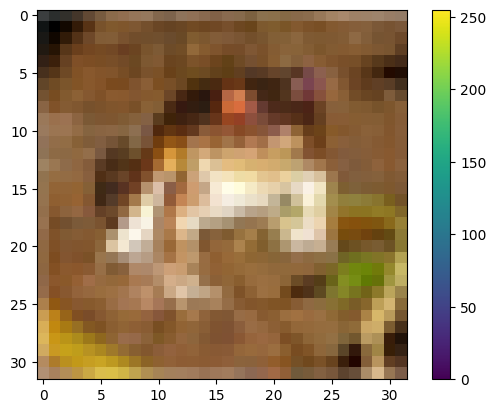

In [3]:
plt.figure()
plt.imshow(images_train[0])
plt.colorbar()  # Barre de couleur pour voir l'échelle des valeurs
plt.show()

### 1.3.2 : Prétraitement des Données
Maintenant, pourriez-vous préparer les données pour l'entraînement?
- Normalisation :
  Les valeurs des pixels doivent être ramenées dans l'intervalle [0;1] . La méthode la plus simple est de diviser par 255.0.
- Encodage des Labels :
  Les labels sont des entiers. Pour une classification multi-classe, il est souvent préférable de les convertir en vecteurs "one-hot".
Note : Si vous ne faites pas d'encodage one-hot, vous utiliserez `sparse_categorical_crossentropy` comme fonction de perte, ce qui est plus simple et efficace en mémoire.

In [4]:
# Ramener les pixels entre 0 et 1 (Normalisation)
images_train = images_train / 255.0
images_test = images_test / 255.0

In [6]:
# Encodage des labels
# Catégories CIFAR-10
categories_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(f"Classes: {categories_names}")

# Conversion en vecteurs one-hot
labels_train_onehot = tf.keras.utils.to_categorical(labels_train, 10)
labels_test_onehot = tf.keras.utils.to_categorical(labels_test, 10)

Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


### 1.3.3 : Construction de l'Architecture CNN
Le coeur de l'exercice est la construction du modèle. Pourriez-vous construire un modèle séquentiel Keras avec la structure suivante :
1. Une base convolutive pour l'extraction de caractéristiques, composée de couches `Conv2D` et `MaxPooling2D` avec une fonction d’activation relu :
    1. Couche `Conv2D((filters = 32, kernel_size =(3, 3), input_size =(#TODO à préciser))`
    2. Couche `MaxPool2D(pool_size=(2, 2))`
    3. Couche `Conv2D((filters = 64,kernel_size=(3, 3), input_size =(#TODO à préciser))`
    4. Couche `MaxPool2D(pool_size=(2, 2))`
    5. Couche `Conv2D((filters = 64,kernel_size=(3, 3), input_size =(#TODO à préciser))`
2. Un classifieur au-dessus, composé de couches Flatten et Dense :
    1. Couche Flatten
    2. Dense avec 64 neurones
    3. Dense avec 10 neurones

In [8]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

### 1.3.4 : Callbacks, Compilation et Entraînement
Avant l'entraînement, il est judicieux de définir des callbacks. Pourriez-vous en configurer deux que sont le `ModelCheckpoint` et le `EarlyStopping` ?
Maintenant, compilez et entraînez le modèle

Capture d’écran n°2 : Image de l’entraînement (console ou autre)

In [12]:
# Définition des Callbacks
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('./checkpoint.model.keras')
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",  # On surveille val_loss
    patience=2  # Arrêt si pas d'amélioration pendant 2 époques
)\
# Configuration du modèle pour l'entraînement
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Entraînement du modèle
model.fit(images_train,
          labels_train_onehot,
          epochs=10,  # Maximum 10 passages sur toutes les données
          validation_split=0.1,  # 10% des données pour la validation
          callbacks=[model_checkpoint, early_stopping])

Epoch 1/10


2025-07-03 15:34:22.905692: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 552960000 exceeds 10% of free system memory.


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(None, 10), output.shape=(None, 10)

### 1.3.5 : Évaluation et Analyse
Enfin, évaluez la performance de votre modèle (via model.evaluate) ; grace à model.history, mettez dans 1 graphe l’accuracy et la val accuracy, dans un second la loss et la validation loss.
Capture d’écran n°3 : Chacun des graphes

### 1.3.6 Matrice de confusion
Faites vos recherches sur la matrice de confusion et mettez la en place pour le modèle.
Capture d’écran n°4 : Affichage de la matrice de confusion dans la console

### 1.3.7 Ouverture : Apprentissage par Transfert (Transfer Learning)
Le modèle que vous avez construit est une excellente base, mais pour atteindre des performances de pointe, surtout avec des données limitées, la technique de référence est l'apprentissage par transfert. L'idée est de réutiliser un modèle déjà entraîné sur un immense jeu de données (comme ImageNet) et de l'adapter à notre tâche spécifique.

Votre prochaine mission est d'appliquer cette technique.
1. Charger un modèle pré-entraîné : Utilisez un modèle comme `MobileNetV2` de `tf.keras.applications`, sans sa couche de classification (`include_top=False`).
2. Geler la base convolutive : Rendez les poids du modèle pré-entraîné non entraînables (`base_model.trainable = False`) pour utiliser le modèle comme un extracteur de caractéristiques fixe.
3. Ajouter une nouvelle tête de classification : Empilez vos propres couches `Dense` au-dessus de la base gelée.
4. Entraîner le nouveau modèle : Seuls les poids de votre tête de classification seront mis à jour.

### 1.3.8 (optionnel mais récompensé) Tensorboard
Faites vos recherches pour utiliser Tensorboard avec votre CNN et mettez le en place.

Indications :

- Ajouter le `Callback` TensorBoard dans votre script d'entraînement.
- Lancer l'entraînement pour générer les fichiers de log.
- Démarrer TensorBoard depuis un terminal pour visualiser les résultats.


P1 Questions pour le rapport :
1. Quel a été le rôle des callbacks `ModelCheckpoint` et `EarlyStopping` ? Ont-ils été utiles pendant votre entraînement ?
2. Analysez les courbes d'apprentissage (perte et précision). Votre modèle présente-t-il des signes de sur-apprentissage ou de sous-apprentissage ? Comment la matrice de confusion vous aide-t-elle à comprendre les erreurs du modèle ?
3. Quels ont été les principaux défis rencontrés ? Comment pourriez-vous améliorer les performances de ce premier modèle ?
4. Comparez les performances (précision, temps d'entraînement) du modèle simple et du modèle basé sur le transfert d'apprentissage. Pourquoi observe-t-on une telle différence ?

# Partie 2 : Analyse de Données Tabulaires avec le Machine Learning Traditionnel

## 2.1. Contexte et Objectifs
Dans ce module, votre objectif sera de démontrer que pour les données structurées et tabulaires, les algorithmes de ML "classiques" sont souvent plus performants et plus simples à mettre en oeuvre que le Deep Learning. Nous allons pivoter vers un cas d'usage de détection de fraude sur les transactions financières, qui introduit le défi crucial des classes fortement déséquilibrées.

À la fin de ce module, votre objectif sera de :
- Mener une analyse exploratoire de données (EDA) avec Pandas et Seaborn.
- Identifier et gérer un problème de déséquilibre de classes.
- Entraîner et évaluer un `RandomForestClassifier` de Scikit-learn.
- Maîtriser l'interprétation des métriques d'évaluation pertinentes : précision, rappel (recall) et F1-score.

## 2.2. Le Jeu de Données : Détection de Fraude
Pourriez-vous utiliser le dataset Credit Card Fraud Detection disponible sur Kaggle? Il contient des transactions anonymisées (`V1` à `V28`) et une variable cible `Class` (1 pour fraude, 0 sinon). Le défi principal est le déséquilibre extrême : moins de 0.2% des transactions sont frauduleuses .

## 2.3. Étapes d’implémentation

### 2.3.1 : Chargement et Analyse Exploratoire (EDA)
Commencez par charger les données et explorer leurs caractéristiques (via les Dataframes de pandas, fonction head, info, describe ; via seaborn.countplot). Vous m’afficherez ces différentes valeurs et métriques.

Capture d’écran n°5 : Les informations demandées précédemment

### 2.3.2 : Préparation des Données
Division Entraînement/Test :
Maintenant, préparez les données pour le modèle.
- Mise à l'échelle : La colonne `Amount` a une échelle très différente des autres. Il est essentiel de la mettre à l'échelle.
= Division Entraînement/Test : Séparez les données en veillant à conserver la même proportion de classes dans les deux ensembles (`stratify=y`).

### 2.3.3 : Entraînement du Modèle
Votre tâche est maintenant d'entraîner un `RandomForestClassifier`. Pour gérer le déséquilibre, pourriez-vous utiliser le paramètre `class_weight='balanced'` ? Il pénalisera davantage les erreurs sur la classe minoritaire (fraude).

Capture d’écran n°5 : Phase d’entraînement en console ou autre

### 2.3.4 : Évaluation Rigoureuse
Enfin, évaluez le modèle en utilisant les métriques appropriées : matrice de confusion, heatmap (via seaborn), classification_report (via scikit-learn/sklearn)